In [1]:
import pandas as pd
import numpy as np


import mysql.connector as sql

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from xgboost import XGBRegressor 

from sklearn.model_selection import GridSearchCV

from scipy.stats import linregress

from sklearn.model_selection import cross_val_score

from sklearn.base import BaseEstimator


from sklearn.pipeline import Pipeline,make_pipeline
import pickle

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [487]:
df = pd.read_csv('data2.csv')

In [488]:
df = df.drop('Unnamed: 0',axis = 1)

In [489]:

scaler = MinMaxScaler()

# Fit scaler on features
df[['listing_mileage']]=scaler.fit_transform(df[['listing_mileage']])


In [466]:
df.head(1000)

,year,listing_mileage,listing_price,mm,cluster
0,2004.0,0.161447,87035.0,Forest River TOYHAULER VISION 31093400,2618
1,2008.0,0.130106,87035.0,Forest River TOYHAULER VISION 31093400,2618
2,2006.0,0.145776,87035.0,Forest River TOYHAULER VISION 31093400,2618
3,1997.0,0.093746,18900.0,Forest River TOYHAULER VISION,2618
4,2015.0,0.126044,49900.0,Forest River TOYHAULER VIPER XLR 305V12,2618
...,...,...,...,...,...
995,2018.0,0.112421,33205.0,Acura MDX,2
996,2022.0,0.000024,68245.0,Acura MDX,2
997,2019.0,0.058364,43995.0,Acura MDX,2
998,2009.0,0.385110,8995.0,Acura MDX,2


In [490]:
gh = df[df['cluster']==2]

gh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10430 entries, 269 to 33944
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             10430 non-null  float64
 1   listing_mileage  10430 non-null  float64
 2   listing_price    10430 non-null  float64
 3   mm               10430 non-null  object 
 4   cluster          10430 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 488.9+ KB


In [491]:
le = LabelEncoder()
gh['mm'] = le.fit_transform(gh['mm'])

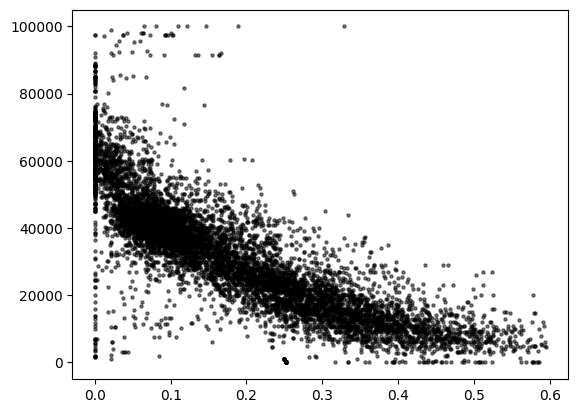

In [492]:
plt.scatter(gh['listing_mileage'], gh['listing_price'], alpha=0.5, marker='o', c='k',s=5)


In [276]:
print(df[df['mm']=='Hyundai Elantra'])

           year  listing_mileage  listing_price               mm  cluster
2049780  2023.0              0.0    30510.00000  Hyundai Elantra     1194
2049781  2019.0          74678.0    16999.00000  Hyundai Elantra     1194
2049782  2021.0          28272.0    25599.00000  Hyundai Elantra     1194
2049783  2013.0          41769.0    15990.00000  Hyundai Elantra     1194
2049784  2014.0         115432.0    12456.53063  Hyundai Elantra     1194
...         ...              ...            ...              ...      ...
2086263  2016.0         104009.0    13999.00000  Hyundai Elantra     1194
2086264  2018.0          80333.0    23598.00000  Hyundai Elantra     1194
2086265  2023.0             10.0    23275.00000  Hyundai Elantra     1194
2086266  2016.0          57876.0    17990.00000  Hyundai Elantra     1194
2086267  2021.0             20.0    21915.00000  Hyundai Elantra     1194

[21078 rows x 5 columns]


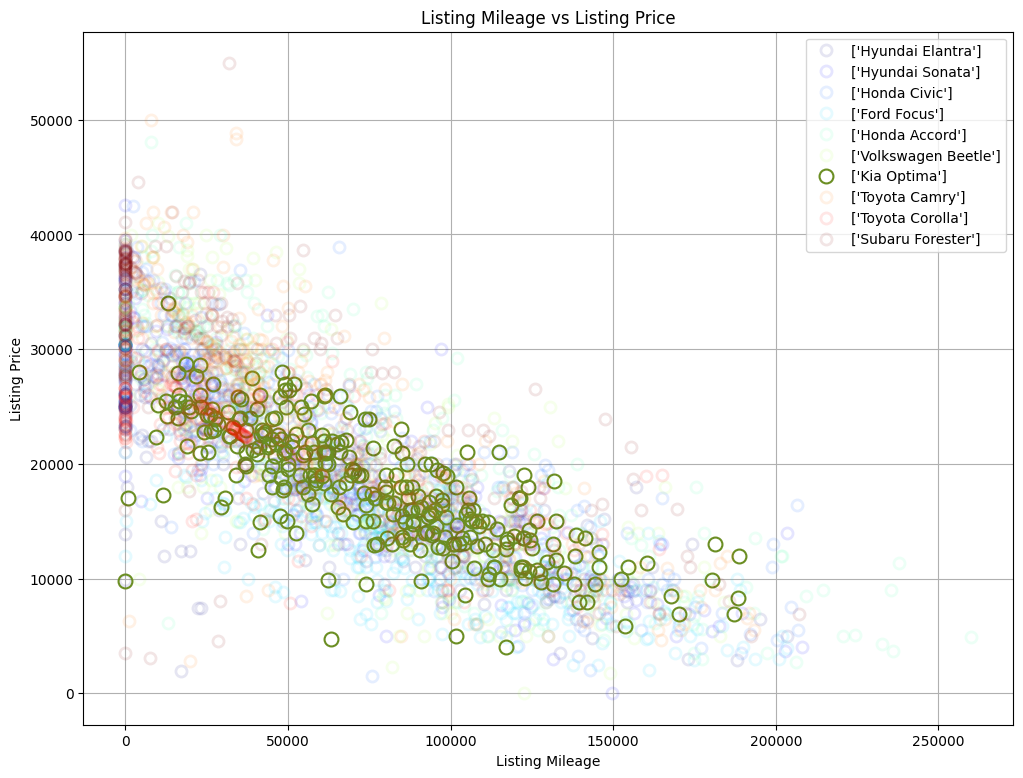

In [277]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 9))

# Define the colors for each cluster
colors = plt.cm.jet(np.linspace(0,1,10))

# Plot the data for each cluster
for i, cluster in enumerate([1194, 1259, 1099, 861, 1057, 2534, 1558, 2383, 2398, 2309]):
    cluster_data = df[df['cluster'] == cluster]
    nm = cluster_data['mm'].unique()
    
   
    sample_data = cluster_data.sample(n=min(300, len(cluster_data)))
    
    # Highlight the plot for the first cluster
    if cluster == 1558:
        ax.plot(sample_data['listing_mileage'], sample_data['listing_price'], linestyle='', marker='o', alpha=1, markersize=10, markeredgewidth=1.5, markerfacecolor='none', markeredgecolor='olivedrab', label=f'{nm}')
    else:
        ax.plot(sample_data['listing_mileage'], sample_data['listing_price'], linestyle='', marker='o', alpha=0.1, markersize=8, markeredgewidth=2, markerfacecolor='none', markeredgecolor=colors[i % len(colors)], label=f'{nm}')

# Set the title and labels
ax.set_title('Listing Mileage vs Listing Price')
ax.set_xlabel('Listing Mileage')
ax.set_ylabel('Listing Price')

# Add a legend
ax.legend()
ax.grid(True)
# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


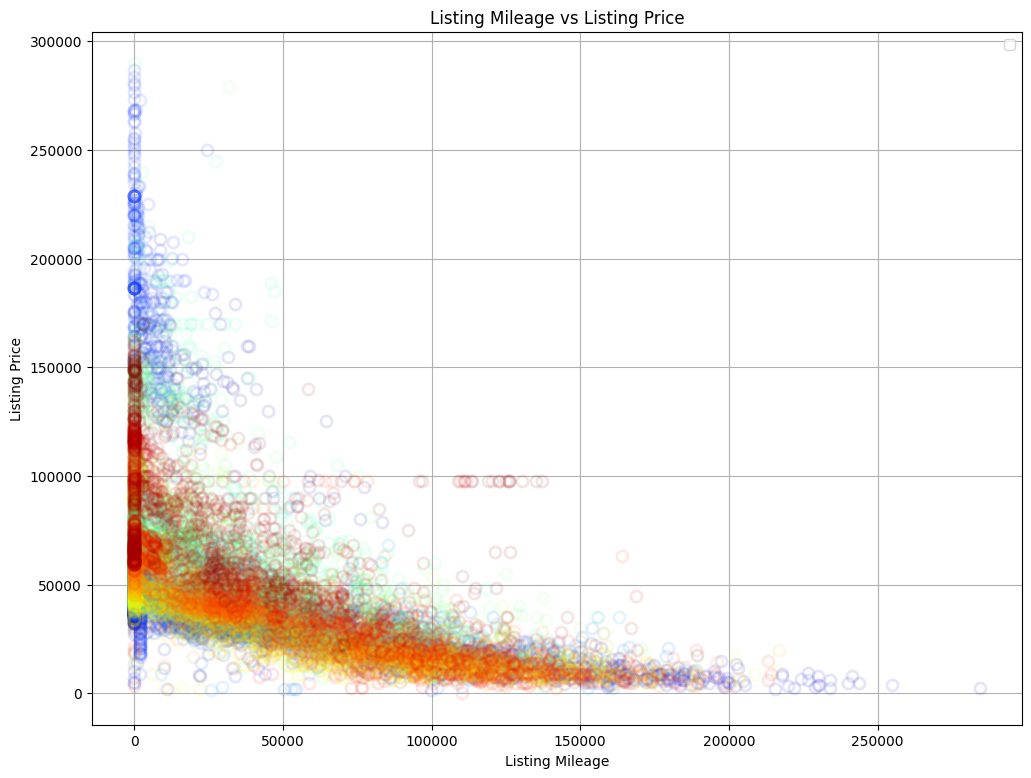

In [278]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 9))

# Define the colors for each cluster
colors = plt.cm.jet(np.linspace(0,1,150))

# Plot the data for each cluster
for i, cluster in enumerate(range(150)):
    cluster_data = df[df['cluster'] == cluster]
    nm = cluster_data['mm'].unique()
    
   
    sample_data = cluster_data.sample(n=min(100, len(cluster_data)))
    
    # Highlight the plot for the first cluster
    if cluster == 1558:
        ax.plot(sample_data['listing_mileage'], sample_data['listing_price'], linestyle='', marker='o', alpha=1, markersize=10, markeredgewidth=1.5, markerfacecolor='none', markeredgecolor='olivedrab', label=f'{nm}')
    else:
        ax.plot(sample_data['listing_mileage'], sample_data['listing_price'], linestyle='', marker='o', alpha=0.1, markersize=8, markeredgewidth=2, markerfacecolor='none', markeredgecolor=colors[i % len(colors)])

# Set the title and labels
ax.set_title('Listing Mileage vs Listing Price')
ax.set_xlabel('Listing Mileage')
ax.set_ylabel('Listing Price')

# Add a legend
ax.legend()
ax.grid(True)
# Show the plot
plt.show()


In [495]:
gh.head(2)

,year,listing_mileage,listing_price,mm,cluster
269,2016.0,0.093060,31990.0,0,2
270,2012.0,0.238256,16500.0,0,2


In [493]:
X_train,X_test,y_train,y_test = train_test_split(gh.drop(columns=['listing_price','cluster']),gh['listing_price'],test_size=0.2, shuffle = True)

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.8098276009953375

In [494]:
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

scores,scores.mean()

(array([0.82054921, 0.79257554, 0.78432627, 0.83282676, 0.79773644]),
 0.8056028435475774)

In [496]:
from xgboost import XGBRegressor

# Create an XGBRegressor object
regressor = XGBRegressor(max_depth=2,learning_rate=0.1, n_estimators = 200)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Predict on new data
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.8883526892094364

In [497]:
scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')

scores,scores.mean()

(array([0.90080019, 0.87051319, 0.86623239, 0.90634163, 0.87801317]),
 0.8843801114132713)

In [481]:
param_grid = {
    'n_estimators': [100,120,150,160],
    'max_depth': [3,5],
    'learning_rate': [0.1]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [498]:
from xgboost import XGBRegressor

# Create an XGBRegressor object
regressor = XGBRegressor(max_depth=3,learning_rate=0.1, n_estimators = 100)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Predict on new data
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.8890866133695935

In [499]:
scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')

scores,scores.mean()

(array([0.90264552, 0.87049094, 0.86900045, 0.90744074, 0.87799605]),
 0.8855147378833317)

# for cluster 2618(rare make models)

In [28]:
gh = df[df['cluster']==2618]

gh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686486 entries, 0 to 4105966
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             686486 non-null  float64
 1   listing_mileage  686486 non-null  float64
 2   listing_price    686486 non-null  float64
 3   mm               686486 non-null  object 
 4   cluster          686486 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 31.4+ MB


In [29]:
gh.head()

,year,listing_mileage,listing_price,mm,cluster
0,2004.0,66308.568048,87035.0,Forest River TOYHAULER VISION 31093400,2618
1,2008.0,53436.292461,87035.0,Forest River TOYHAULER VISION 31093400,2618
2,2006.0,59872.430255,87035.0,Forest River TOYHAULER VISION 31093400,2618
3,1997.0,38503.000000,18900.0,Forest River TOYHAULER VISION,2618
4,2015.0,51768.007751,49900.0,Forest River TOYHAULER VIPER XLR 305V12,2618


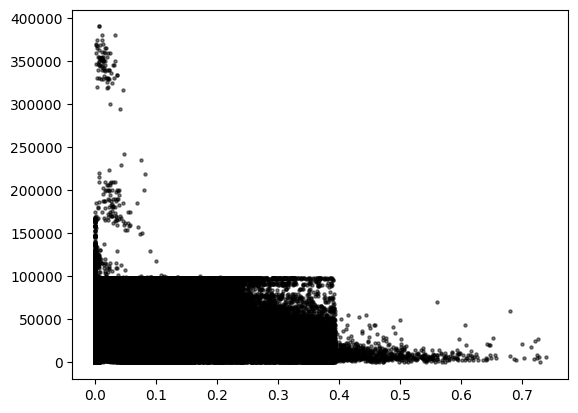

In [455]:
plt.scatter(gh['listing_mileage'], gh['listing_price'], alpha=0.5, marker='o', c='k',s=5)


In [456]:
X_train,X_test,y_train,y_test = train_test_split(gh.drop(columns=['listing_price','mm','cluster']),gh['listing_price'],test_size=0.2, shuffle = True)

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.24519243351528663

In [457]:
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

scores,scores.mean()

(array([0.24598819, 0.24600111, 0.24663764, 0.24524352, 0.24512149]),
 0.24579838892754094)

In [332]:
# trying 

In [458]:
le = LabelEncoder()
gh['cluster'] = le.fit_transform(gh['mm'])

In [459]:
gh['cluster'].nunique()

232853

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


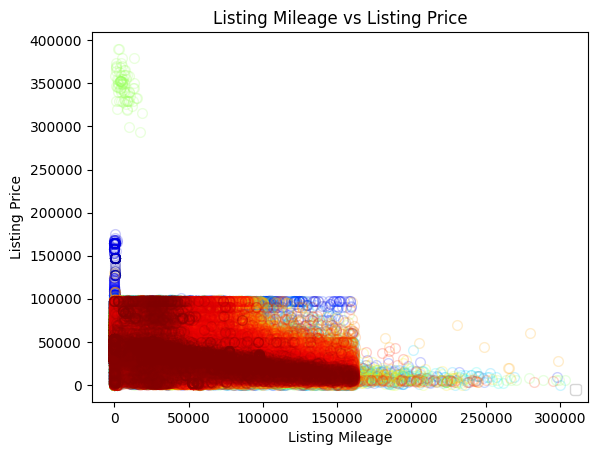

<Figure size 1800x1200 with 0 Axes>

In [335]:
fig, ax = plt.subplots()

# Define the colors for each cluster
colors = plt.cm.jet(np.linspace(0,1,100000))
# Increase figure size
fig = plt.figure(figsize=(18, 12))
# Plot the data for each cluster
for i, cluster in enumerate(range(100000)):
    cluster_data = gh[gh['cluster'] == cluster]
    nm = cluster_data['mm'].unique()
    
    # Select a random sample of at most 100 rows from the data
    sample_data = cluster_data.sample(n=min(150, len(cluster_data)))
    
    ax.plot(sample_data['listing_mileage'], sample_data['listing_price'], linestyle='', marker='o', alpha=0.2, markersize=7, markeredgewidth=1, markerfacecolor='none', markeredgecolor=colors[i % len(colors)])

# Set the title and labels
ax.set_title('Listing Mileage vs Listing Price')
ax.set_xlabel('Listing Mileage')
ax.set_ylabel('Listing Price')

# Add a legend
ax.legend()
# Add a legend on the top right corner
ax.legend(loc='lower right')

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


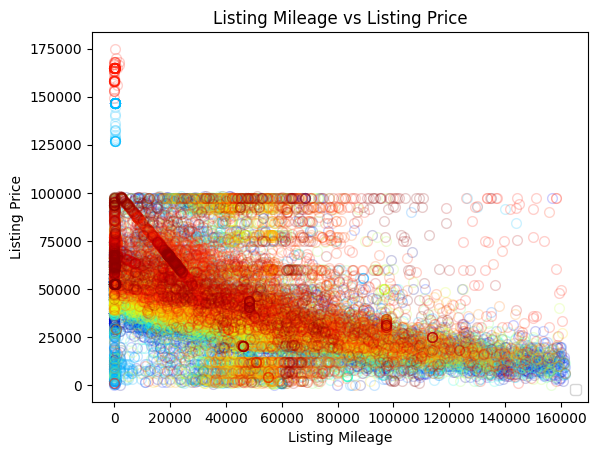

<Figure size 1800x1200 with 0 Axes>

In [336]:
fig, ax = plt.subplots()

# Define the colors for each cluster
colors = plt.cm.jet(np.linspace(0,1,10000))
# Increase figure size
fig = plt.figure(figsize=(18, 12))
# Plot the data for each cluster
for i, cluster in enumerate(range(10000)):
    cluster_data = gh[gh['cluster'] == cluster]
    nm = cluster_data['mm'].unique()
    
    # Select a random sample of at most 100 rows from the data
    sample_data = cluster_data.sample(n=min(150, len(cluster_data)))
    
    ax.plot(sample_data['listing_mileage'], sample_data['listing_price'], linestyle='', marker='o', alpha=0.2, markersize=7, markeredgewidth=1, markerfacecolor='none', markeredgecolor=colors[i % len(colors)])

# Set the title and labels
ax.set_title('Listing Mileage vs Listing Price')
ax.set_xlabel('Listing Mileage')
ax.set_ylabel('Listing Price')

# Add a legend
ax.legend()
# Add a legend on the top right corner
ax.legend(loc='lower right')

# Show the plot
plt.show()

In [35]:
encoder = BinaryEncoder(cols = ['mm'])

In [37]:
gh = encoder.fit_transform(gh)

In [38]:
gh.head()

,year,listing_mileage,listing_price,mm_0,mm_1,mm_2,mm_3,mm_4,mm_5,mm_6,...,mm_9,mm_10,mm_11,mm_12,mm_13,mm_14,mm_15,mm_16,mm_17,cluster
0,2004.0,66308.568048,87035.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2618
1,2008.0,53436.292461,87035.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2618
2,2006.0,59872.430255,87035.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2618
3,1997.0,38503.000000,18900.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2618
4,2015.0,51768.007751,49900.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2618


In [39]:
X_train,X_test,y_train,y_test = train_test_split(gh.drop(columns=['listing_price','cluster']),gh['listing_price'],test_size=0.2, shuffle = True)

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.2513270304525316

In [40]:
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

scores,scores.mean()

(array([0.24651435, 0.24972679, 0.24819486, 0.24764909, 0.24494818]),
 0.24740665481313595)

In [49]:
from xgboost import XGBRegressor

# Create an XGBRegressor object
regressor = XGBRegressor(max_depth=16,learning_rate = 0.2)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Predict on new data
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.5733324629478747

In [42]:
scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')

scores,scores.mean()

KeyboardInterrupt: 

## again making clusters using mm

In [2]:
df = pd.read_csv('data2.csv')
df = df.drop('Unnamed: 0',axis = 1)





In [3]:
df1 = df[df['cluster'] != 2618]   # for non rare vehicles
df2 = df[df['cluster'] == 2618]   # for rare vehicles

# droping cluster column as not in input for training data


df2 = df2.drop('cluster',axis = 1)

# creating pipline  :
for non rare cars (mm_count <100)

In [13]:

df2.head(2)

,year,listing_mileage,listing_price,mm
0,2004.0,66308.568048,87035.0,Forest River TOYHAULER VISION 31093400
1,2008.0,53436.292461,87035.0,Forest River TOYHAULER VISION 31093400


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686486 entries, 0 to 4105966
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             686486 non-null  float64
 1   listing_mileage  686486 non-null  float64
 2   listing_price    686486 non-null  float64
 3   mm               686486 non-null  object 
dtypes: float64(3), object(1)
memory usage: 26.2+ MB


In [15]:
X_train,X_test,y_train,y_test = train_test_split(df2.drop(columns=['listing_price']),df2['listing_price'],test_size=0.2, shuffle = True)


In [16]:
X_train.head(2)

,year,listing_mileage,mm
964856,2019.0,29987.0,Dodge Charger SXT Sedan for sale near you in S...
77347,2019.0,31996.0,Audi S5 Cabriolet


In [18]:
# binary encoding mm
trf1 = ColumnTransformer([
       
    ('binary_encoder', ce.BinaryEncoder(), [2]) 
    
],remainder='passthrough')

In [19]:
# train model
trf2 = XGBRegressor(max_depth=15,learning_rate=0.2, n_estimators = 100)

In [20]:
# Creating pipeline

pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
    
])

In [21]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary_encoder',
                                                  BinaryEncoder(), [2])])),
                ('trf2',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=No...None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=15, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [22]:
y_pred = pipe.predict(X_test)

In [23]:
y_pred

array([ 8107.3247, 15826.125 , 62931.53  , ..., 16315.867 , 48194.19  ,
       28859.588 ], dtype=float32)

In [24]:
r2 = r2_score(y_test, y_pred)
r2


0.46676153086632

In [25]:
# exporting pipline for rare make models 
pickle.dump(pipe,open('pipe_rare.pkl','wb'))

# For non rare cars

mm_count >= 100

In [4]:
df1.head(200000)

,year,listing_mileage,listing_price,mm,cluster
269,2016.0,38221.000000,31990.0,Acura MDX,2
270,2012.0,97855.000000,16500.0,Acura MDX,2
271,2019.0,40994.000000,39998.0,Acura MDX,2
272,2014.0,113448.000000,23888.0,Acura MDX,2
273,2012.0,238000.000000,14800.0,Acura MDX,2
...,...,...,...,...,...
263043,2022.0,0.000000,50708.0,Buick Envision,219
263044,2022.0,5585.872350,39315.0,Buick Envision,219
263045,2022.0,10.000000,47330.0,Buick Envision,219
263046,2019.0,23493.000000,34101.0,Buick Envision,219


In [5]:
df1 = df1.drop('cluster', axis = 1)

In [6]:
df1.head(2)

,year,listing_mileage,listing_price,mm
269,2016.0,38221.0,31990.0,Acura MDX
270,2012.0,97855.0,16500.0,Acura MDX


In [7]:
X = df1.drop('listing_price', axis=1)
y = df1['listing_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train.head(2),y_train.head(2)

(           year  listing_mileage                    mm
 1745802  2014.0         125000.0       GMC Sierra 1500
 1252507  2020.0          45289.0  Ford Fusion SE Sedan,
 1745802    26995.000000
 1252507    23882.615866
 Name: listing_price, dtype: float64)

In [11]:
# Define a custom ensemble model that clusters the data based on the mm column and trains an XGBoost model for each cluster

class MmEnsembleModel(BaseEstimator):
    def __init__(self):
        self.models = {}
    
    def fit(self, X, y):
        # Train an XGBoost model for each mm
        for mm in X['mm'].unique():
            # Filter the training data for the current mm
            X_train_mm = X.loc[X['mm'] == mm, ['year', 'listing_mileage']]

            y_train_mm = y[X['mm'] == mm]
            
            # Create and train the XGBoost model
            model = XGBRegressor(max_depth=3,learning_rate=0.1, n_estimators = 100)
            model.fit(X_train_mm, y_train_mm)
            
            # Store the trained model in the dictionary
            self.models[mm] = model
        
        return self
    
    
    def predict(self, X):
        # Make predictions using the trained models
        y_pred = []
        for i, row in X.iterrows():
            # Get the mm for the current row
            mm = row['mm']
            
            # Use the corresponding model to make a prediction
            pred = self.models[mm].predict(row[['year', 'listing_mileage']].values.reshape(1, -1))

            
            # Append the prediction to the list of predictions
            y_pred.append(pred[0])
        
        return y_pred
    


In [12]:
# Create a pipeline that includes the MmEncoder and MmEnsembleModel
pipeline = Pipeline([
    
    ('model', MmEnsembleModel())
])


In [13]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', MmEnsembleModel())])

In [15]:
# Make predictions on the testing set using the pipeline
y_pred = pipeline.predict(X_test)

In [16]:
r2 = r2_score(y_test, y_pred)
r2


0.9046798815382879

In [14]:
# exporting pipline for non rare make models 
pickle.dump(pipeline,open('pipe_non_rare.pkl','wb'))